In [17]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import pos_tag, word_tokenize

In [2]:
nltk.data.path.append(r'C:\Users\HHH\Desktop\plunket')
# Download required NLTK resources if not already downloaded
nltk.download('stopwords', download_dir=r'C:\Users\HHH\Desktop\plunket')
nltk.download('punkt', download_dir=r'C:\Users\HHH\Desktop\plunket')
nltk.download('averaged_perceptron_tagger', download_dir=r'C:\Users\HHH\Desktop\plunket')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HHH\Desktop\plunket...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HHH\Desktop\plunket...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HHH\Desktop\plunket...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
stop_words = set(stopwords.words('english'))
stop_words.remove("not")

In [4]:
# Initialize the Chrome browser driver
# chrome_options = Options()
# chrome_options.add_argument("--headless")  # Run headless to avoid opening the browser window
# chrome_options.add_argument("--no-sandbox")
# chrome_options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome()
url='https://www.amazon.in/Boat-Rockerz-550-Headphone-Aesthetics/dp/B0856HNLDK/ref=sr_1_18?sr=8-18'
# URL of the product
# url = """https://www.amazon.in/Portronics-Wireless-Optical-Orientation-Adjustable/dp/B0B296NTFV/ref=cm_cr_arp_d_product_top?ie=UTF8"""
reviews_dict = {5: [], 4: [], 3: [], 2: [], 1: []}
reviews_dict_text = {5: [], 4: [], 3: [], 2: [], 1: []}

# Open the initial page
driver.get(url)

# Go to all reviews page
link_element = driver.find_element(By.CSS_SELECTOR, 'a[data-hook="see-all-reviews-link-foot"]')
link_element.click()

# Wait for the full page to load
time.sleep(0.1)

# Function to get the next page URL
def another_page_url(driver):
    try:
        ul = driver.find_element(By.CSS_SELECTOR, 'ul.a-pagination')
        next_page_li_s_html = ul.get_attribute('outerHTML')
        soup = BeautifulSoup(next_page_li_s_html, 'html.parser')
        next_li = soup.find_all('li', class_='a-last')
        if next_li and next_li[0].find('a'):
            return next_li[0].find('a')['href']
        else:
            return False
    except Exception as e:
        print("Error in getting next page URL:", e)
        return None

# Function to scrape reviews and handle pagination
def scrape_reviews(link, star_rating):
    link = link
    while link :
        driver.get(link)
        time.sleep(0.1)  # Let the page load
        try:
            reviews = driver.find_elements(By.CSS_SELECTOR, 'div[data-hook="review"]')
            for review in reviews:
                # review_text = review.find_element(By.CSS_SELECTOR, 'span[data-hook="review-body"]')
                reviews_dict[star_rating].append(review.get_attribute('outerHTML'))  # Append the review text to the list
                reviews_dict_text[star_rating].append(review.text)  # Append the review text to the list

            # Get the next page URL
            next_page_relative_url = another_page_url(driver)
            print(next_page_relative_url)
        
            if next_page_relative_url:
                link = "https://www.amazon.in" + next_page_relative_url
            else:
                return None
        except Exception as e:
            print(f"Error scraping reviews for {star_rating} star rating: {e}")
            break

# Scrape reviews for each star rating (5 to 1 stars)

# Get the histogram table and all star rating links
ul_element = driver.find_element(By.ID, "histogramTable")
a_tags = ul_element.find_elements(By.TAG_NAME, "a")
hrefs= []

for a_tag in a_tags :
    # print(a_tag.get_attribute("href"))
    hrefs.append(a_tag.get_attribute("href"))



star_rating = 5
for link in hrefs :
        try : 
            print(link , star_rating)
            scrape_reviews(link,star_rating)  # Scrape reviews for this star rating
            star_rating = star_rating - 1
        except Exception as e:
                print(f"Error processing {star_rating} star link after retries: {e}")

# Print all collected reviews
for star, reviews in reviews_dict.items():
    print(f"Reviews for {star} stars:")
    print(star, len(reviews))
    
# Optionally close the driver
# driver.quit()

https://www.amazon.in/product-reviews/B0856HNLDK/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar 5
/Boat-Rockerz-550-Headphone-Aesthetics/product-reviews/B0856HNLDK/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&filterByStar=five_star&pageNumber=2&reviewerType=all_reviews
/Boat-Rockerz-550-Headphone-Aesthetics/product-reviews/B0856HNLDK/ref=cm_cr_arp_d_paging_btm_3?ie=UTF8&filterByStar=five_star&pageNumber=3&reviewerType=all_reviews
/Boat-Rockerz-550-Headphone-Aesthetics/product-reviews/B0856HNLDK/ref=cm_cr_arp_d_paging_btm_4?ie=UTF8&filterByStar=five_star&pageNumber=4&reviewerType=all_reviews
/Boat-Rockerz-550-Headphone-Aesthetics/product-reviews/B0856HNLDK/ref=cm_cr_arp_d_paging_btm_5?ie=UTF8&filterByStar=five_star&pageNumber=5&reviewerType=all_reviews
False
https://www.amazon.in/product-reviews/B0856HNLDK/ref=acr_dp_hist_4?ie=UTF8&filterByStar=four_star&reviewerType=all_reviews#reviews-filter-bar 4
/Boat-Rockerz-550-Headphone-Aesthetics/product-rev

In [5]:
def name_fun(soup):
    try:
        profile_name = soup.find(class_='a-profile-name').string
        return profile_name
    except : 
        print("error occured")
        return None
def title_fun(soup):
    try:
        review_title = soup.find('a', {'data-hook': 'review-title'}).find_all('span')[-1].text.strip()
        return review_title
    except :
        print("error occured")
        return None
    

def rating_fun(soup):
    try:
        review_rating = soup.find('i', class_='review-rating').span.string.strip()
        return review_rating[0:3]
    except :
        print("error occured")
        return None
    
    
def review_fun(soup):
    try:
        review_body = soup.find('span', class_='review-text-content')
        # Get the text, handling the 'br' tags by replacing them with new lines
        review_text = review_body.get_text(separator="\n").strip()
        return review_text
    except:
        print('error occured')
        return None


data = {
    'name':[],
    'title':[],
    'rating':[],
    'review':[]
}

for star,reviews_list in reviews_dict.items() : 
    for i,review in enumerate(reviews_list):
        soup = BeautifulSoup(review, 'html.parser')
        data['name'].append(name_fun(soup))
        data['title'].append(title_fun(soup))
        data['rating'].append(rating_fun(soup))
        data['review'].append(review_fun(soup))

In [7]:
df = pd.DataFrame(data)
df['rating'] = df['rating'].astype(float)

In [8]:
df.sample(5)

name                  title  rating  \
88      ROHIT RAJ GUPTA                   Nice     4.0   
13          Lalit yadav       Boat rockers 550     5.0   
243               Arnav     Working of product     1.0   
245                   P  Worst product quality     1.0   
163  Abdul Khaliq Sayed              Poor Bass     2.0   

                                                review  
88                               Good quality products  
13   Best in this price segment soo soft and comfor...  
243  The product is not working properly only after...  
245  I will never buy Boat products again. Even I h...  
163                          Bass not as not described

### Word Cloud simple

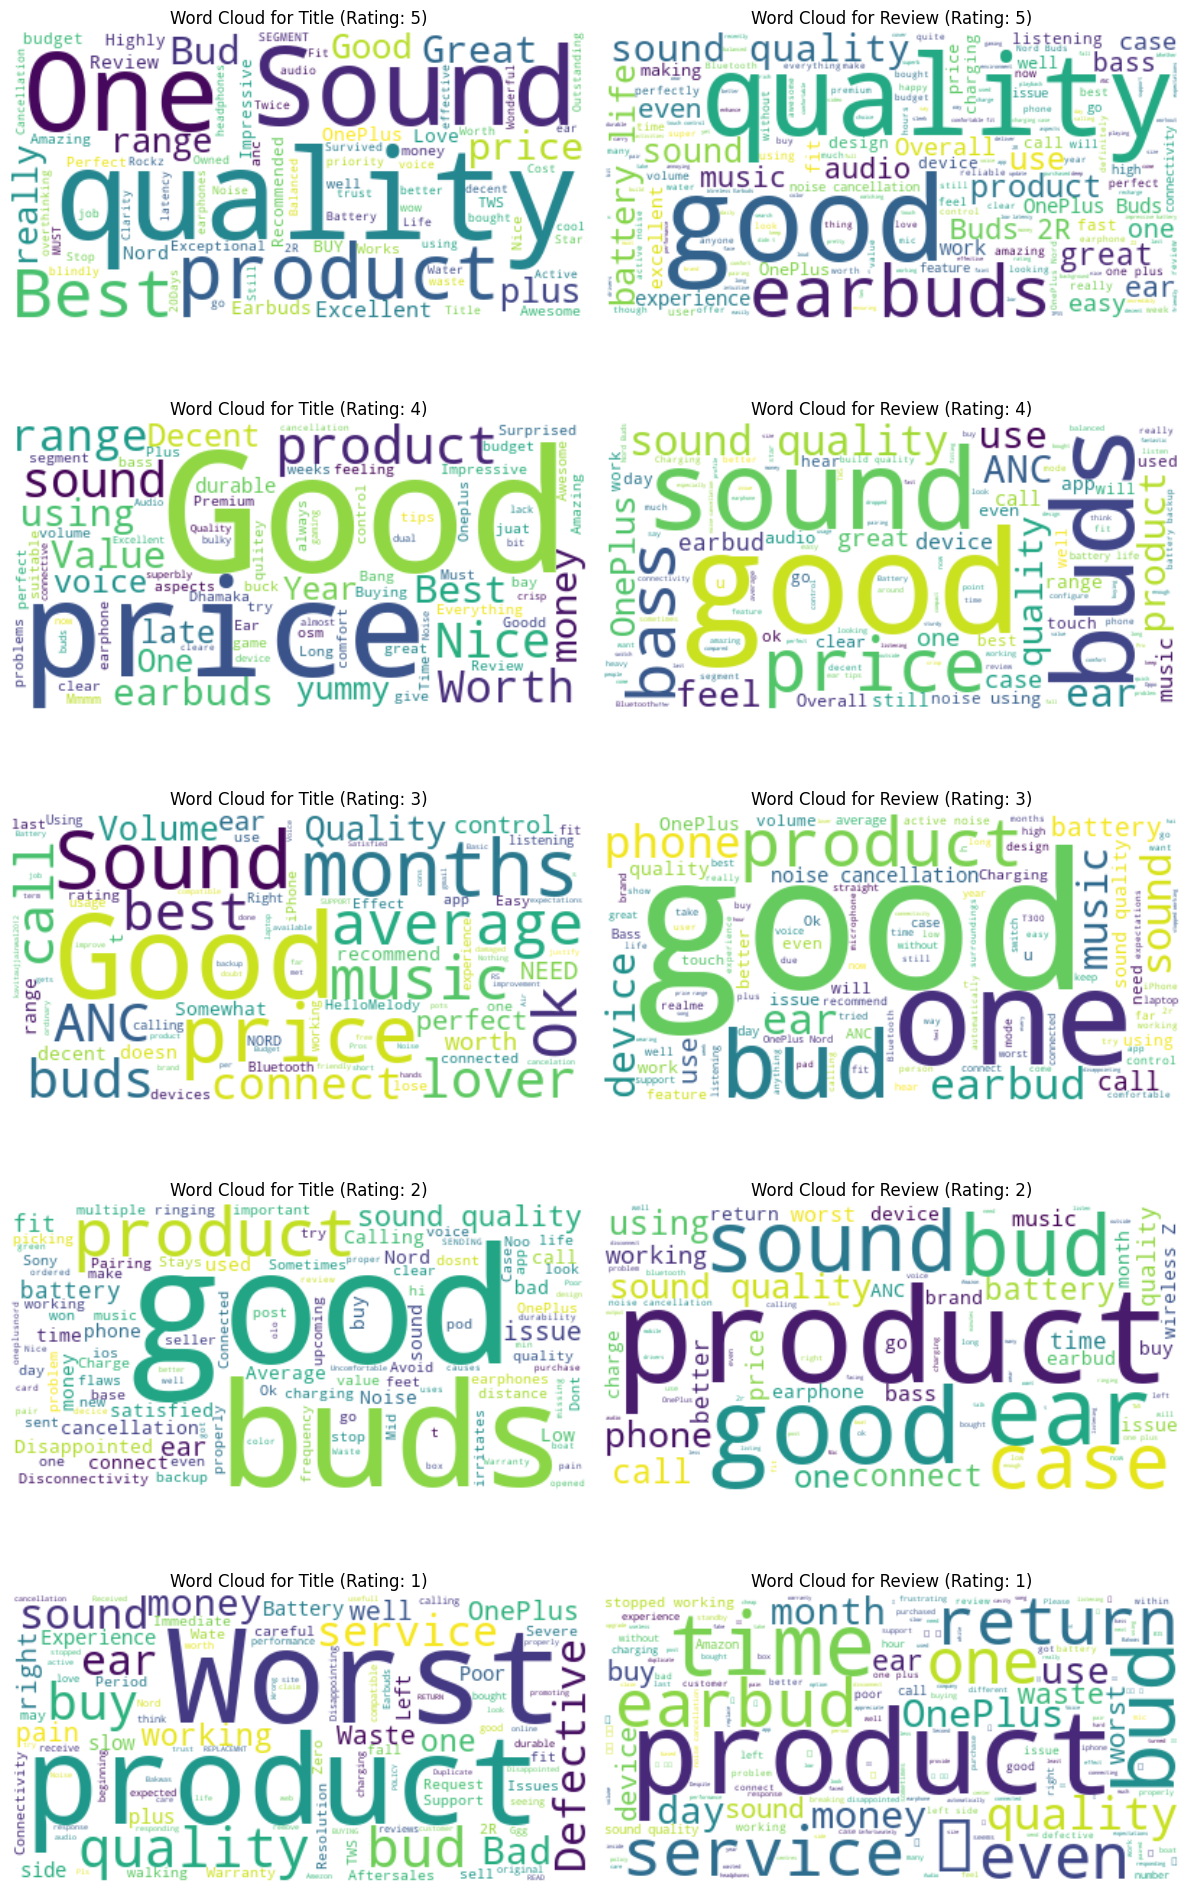

In [6]:
# data = {
#     'name':[],
#     'title':[],
#     'rating':[],
#     'review':[]
# }

# Define the number of rows (5 ratings) and columns (2: one for title, one for review)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))

# Loop through the ratings from 5 to 1
for i, rating in enumerate(range(5, 0, -1)):  # 5 to 1
    # Filter the row corresponding to the current rating
    row = df[df['rating'] == rating]
    
    if not row.empty:
        title_text = ' '.join(row['title'])
        review_text = ' '.join(row['review'])
        
        # Generate word clouds
        title_wordcloud = WordCloud(width=400, height=200, background_color='white').generate(title_text)
        review_wordcloud = WordCloud(width=400, height=200, background_color='white').generate(review_text)
        
        # Plot Title WordCloud in the first column
        axes[i, 0].imshow(title_wordcloud, interpolation='bilinear')
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f'Word Cloud for Title (Rating: {rating})')
        
        # Plot Review WordCloud in the second column
        axes[i, 1].imshow(review_wordcloud, interpolation='bilinear')
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f'Word Cloud for Review (Rating: {rating})')

# Adjust layout
plt.tight_layout()
plt.show()

### Barplot simple

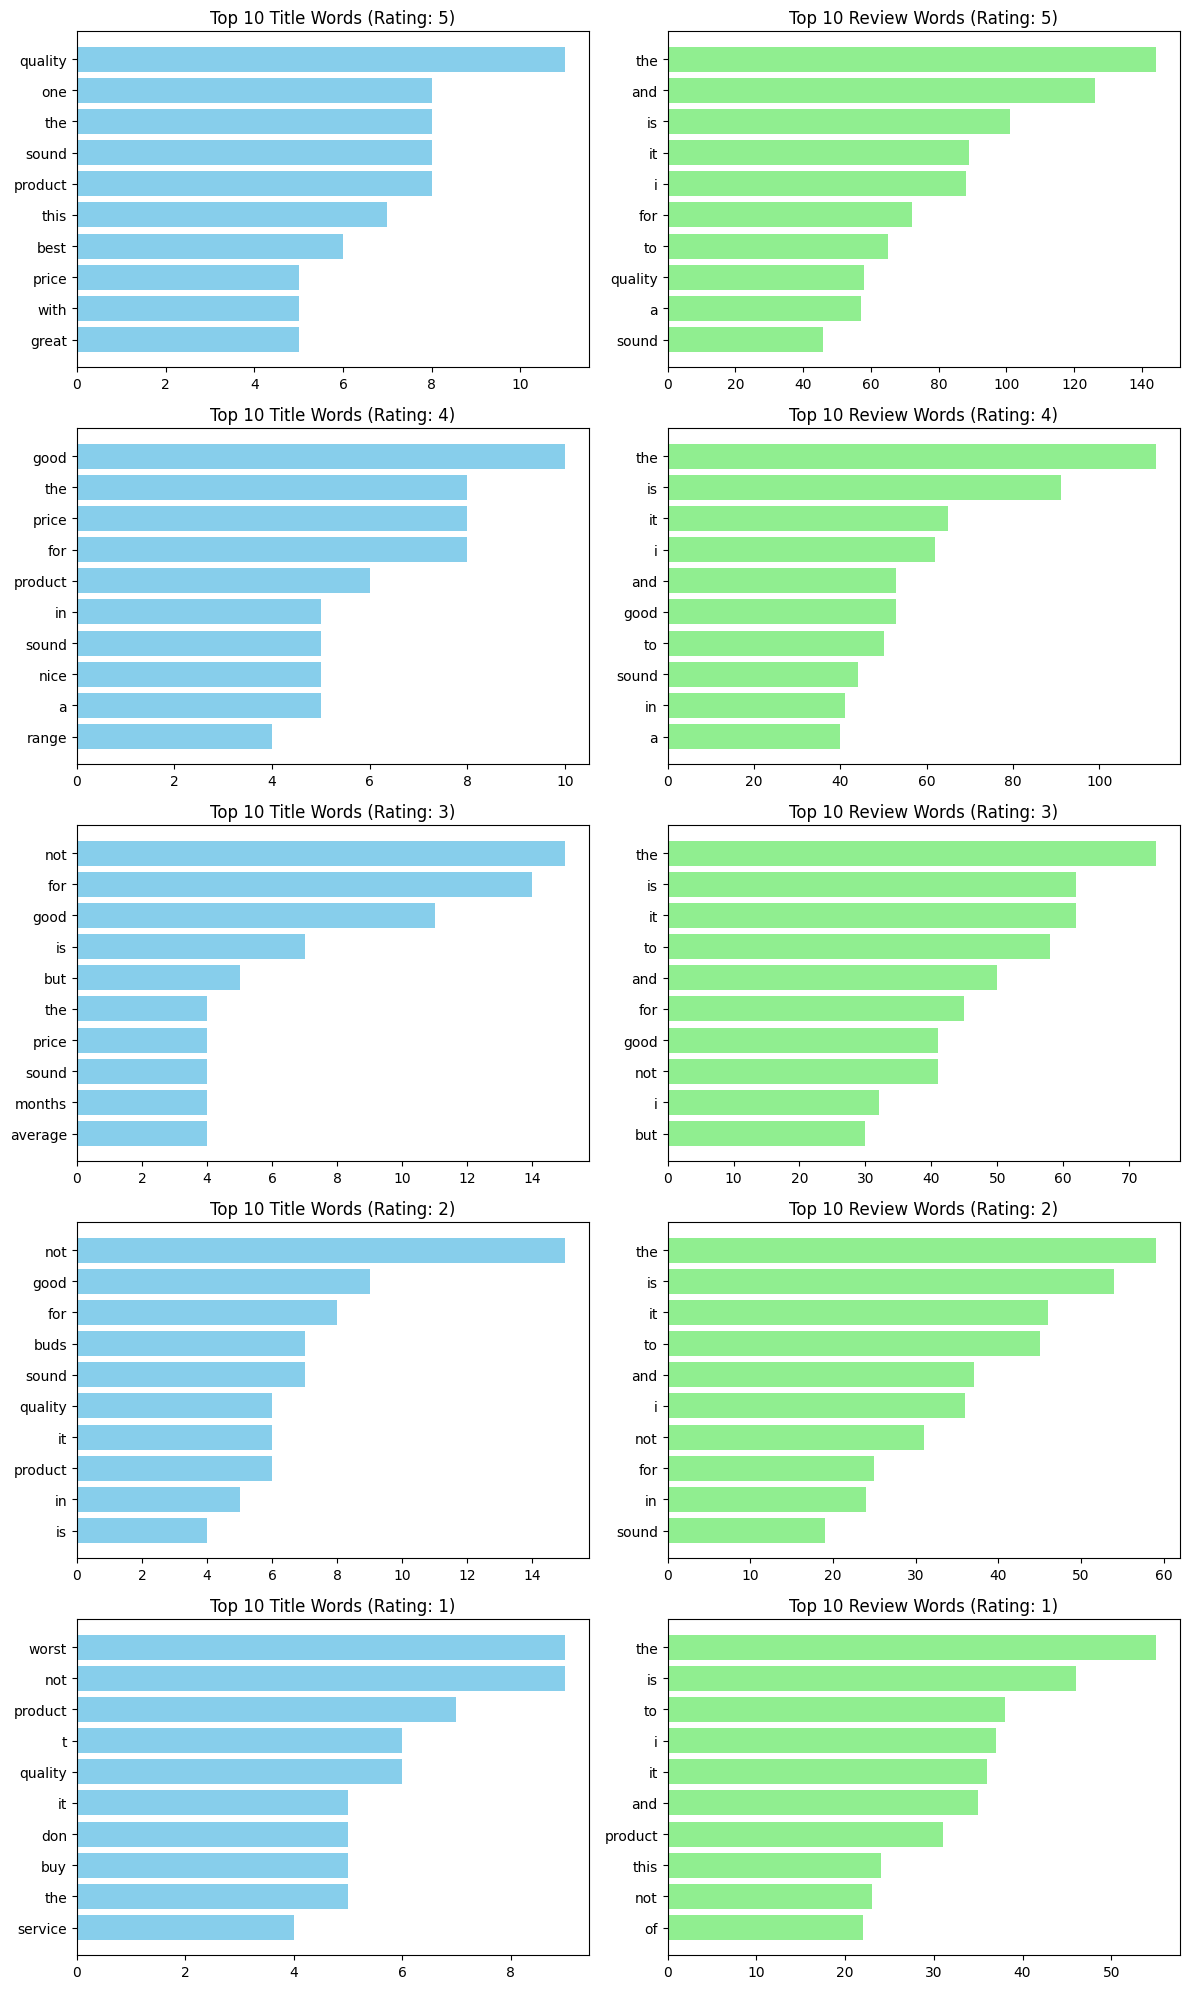

In [8]:

df = pd.DataFrame(data)
df['rating'] = df['rating'].astype(float)

# Function to clean and tokenize text
def tokenize(text):
    # Remove special characters and numbers, then split by spaces
    text = re.sub(r'\W+', ' ', text.lower())
    words = text.split()
    return words

# Define the number of rows (5 ratings) and columns (2: one for title, one for review)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))

# Loop through the ratings from 5 to 1
for i, rating in enumerate(range(5, 0, -1)):  # Ratings 5 to 1
    # Filter the row corresponding to the current rating
    row = df[df['rating'] == rating]
    
    if not row.empty:
        # Tokenize the title and review text
        title_words = tokenize(' '.join(row['title']))
        review_words = tokenize(' '.join(row['review']))
        
        # Get the top 10 most common words for title and review
        title_word_counts = Counter(title_words).most_common(10)
        review_word_counts = Counter(review_words).most_common(10)
        
        # Unzip the word-count pairs for plotting
        title_words, title_counts = zip(*title_word_counts) if title_word_counts else ([], [])
        review_words, review_counts = zip(*review_word_counts) if review_word_counts else ([], [])
        
        # Plot Title Word Frequency in the first column
        axes[i, 0].barh(title_words, title_counts, color='skyblue')
        axes[i, 0].set_title(f'Top 10 Title Words (Rating: {rating})')
        axes[i, 0].invert_yaxis()  # To display the highest frequency on top
        
        # Plot Review Word Frequency in the second column
        axes[i, 1].barh(review_words, review_counts, color='lightgreen')
        axes[i, 1].set_title(f'Top 10 Review Words (Rating: {rating})')
        axes[i, 1].invert_yaxis()  # To display the highest frequency on top

# Adjust layout
plt.tight_layout()
plt.show()

### remove Stop words

In [10]:
# Function to clean, tokenize, remove stop words, and create bigrams
def remove_stop_words(text):
    text = re.sub(r'\W+', ' ', text.lower())
    words = text.split()
    # Remove stop words
    words = [ word for word in words if word not in stop_words ]
    return ' '.join(words)

df['title'] = df['title'].apply(remove_stop_words)
df['review'] = df['review'].apply(remove_stop_words)

### Tri grams

In [ ]:
def tokenize_bigrams(text):
    # Remove special characters and numbers, then split by spaces
    text = re.sub(r'\W+', ' ', text.lower())
    words = text.split()
    # Remove stop words
    # Create bigrams (two consecutive words)
    bigrams = ngrams(words, 1)
    # Join bigrams with underscores
    bigram_words = [ '_'.join(bigram) for bigram in bigrams ]
    return ' '.join(bigram_words)

# # Apply the updated tokenize_bigrams function to the 'title' and 'review' columns
df['title'] = df['title'].apply(tokenize_bigrams)
df['review'] = df['review'].apply(tokenize_bigrams)


In [12]:
df.sample(4)

name                                              title  rating  \
95   Abhinav Patel                                      2 year review     4.0   
131    Suresh Meti                                 comfort durability     3.0   
243          Arnav                                    working product     1.0   
190    Ayush gupta  excellent sound connectivity bad went replacement     2.0   

                                                review  
95   sound quality really good product cost rs 1700...  
131  blend positives drawbacks design functionality...  
243  product not working properly week 1 side ear c...  
190  used product 6 days used 29 hours sound excell...

### Word Cloud after trigrams

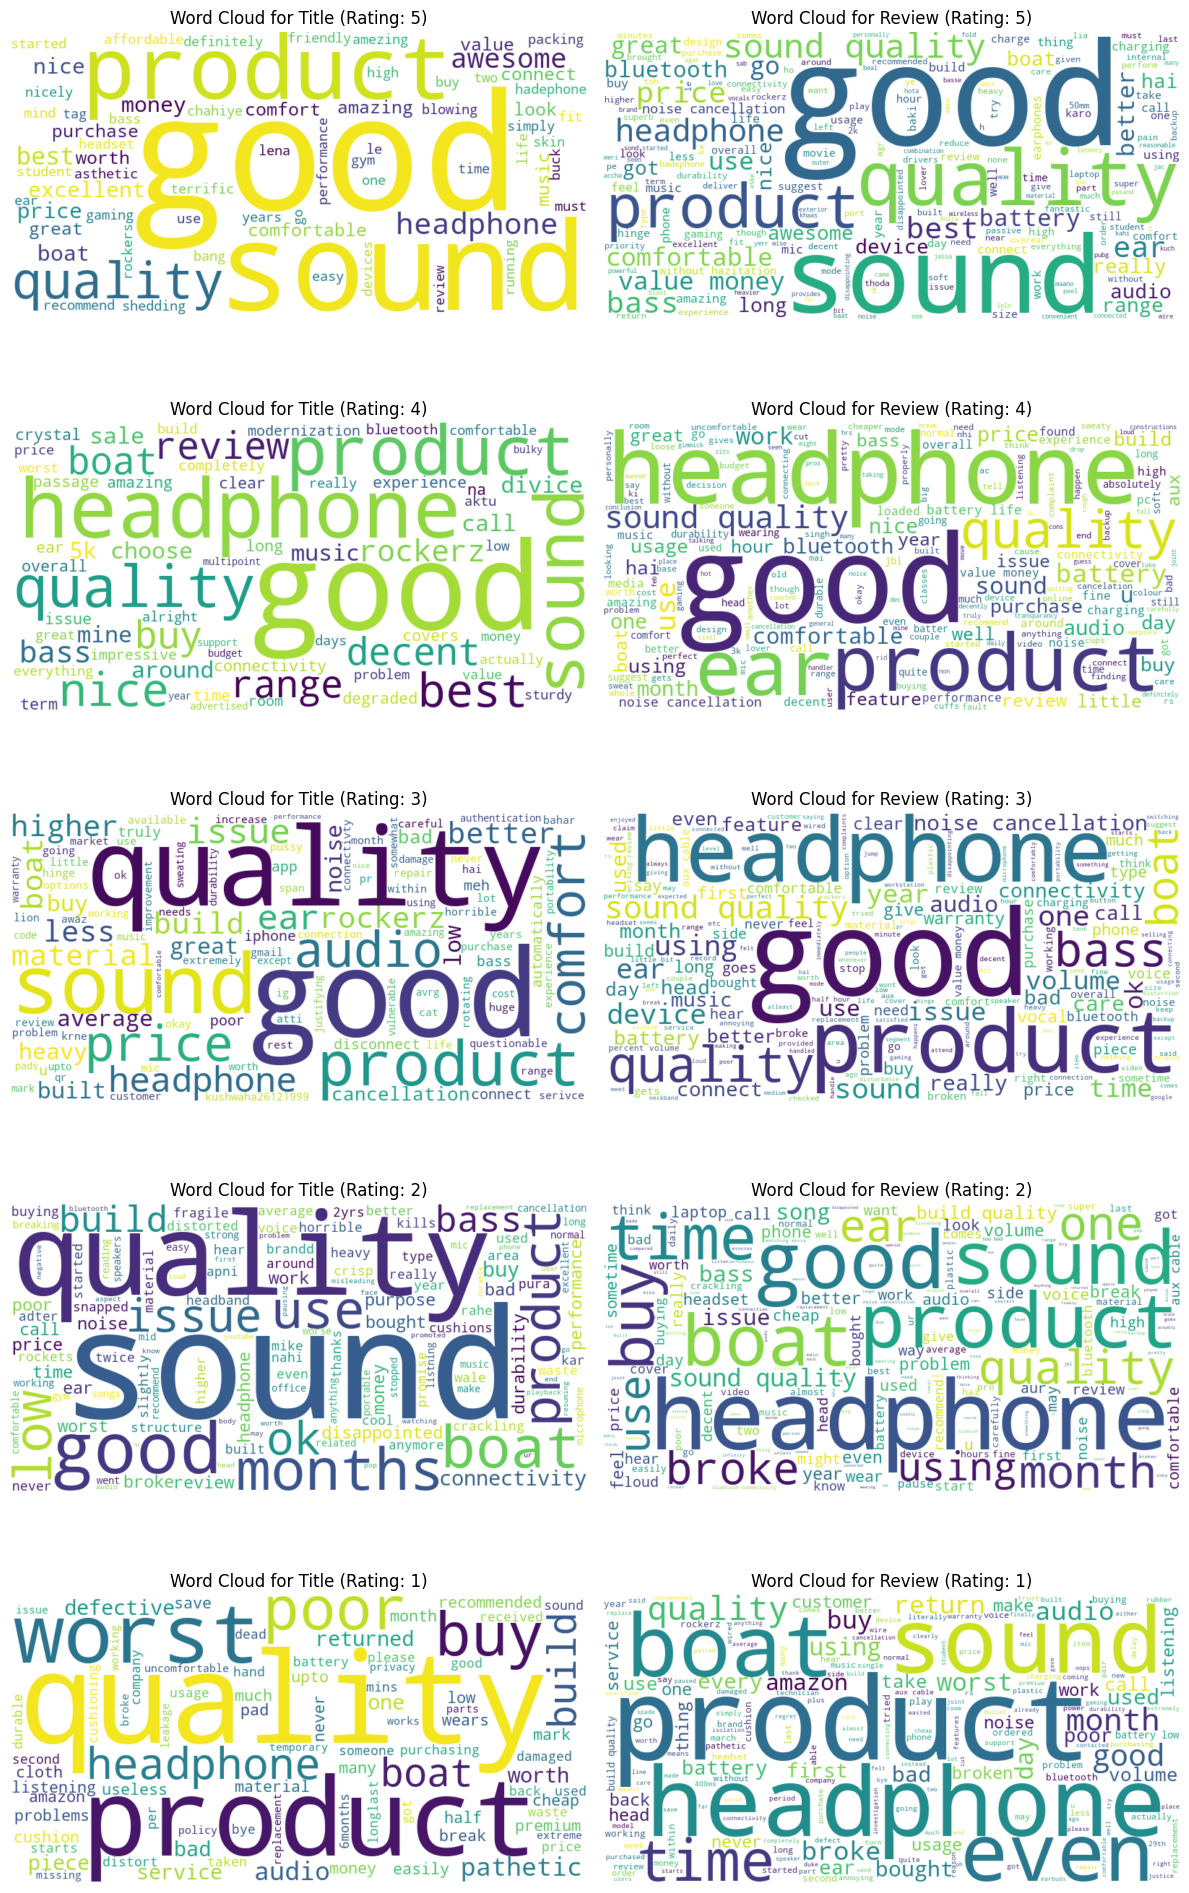

In [18]:
# data = {
#     'name':[],
#     'title':[],
#     'rating':[],
#     'review':[]
# }

# Define the number of rows (5 ratings) and columns (2: one for title, one for review)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))

# Loop through the ratings from 5 to 1
for i, rating in enumerate(range(5, 0, -1)):  # 5 to 1
    # Filter the row corresponding to the current rating
    row = df[df['rating'] == rating]
    
    if not row.empty:
        title_text = ' '.join(row['title'])
        review_text = ' '.join(row['review'])
        
        # Generate word clouds
        title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)
        review_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)
        
        # Plot Title WordCloud in the first column
        axes[i, 0].imshow(title_wordcloud, interpolation='bilinear')
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f'Word Cloud for Title (Rating: {rating})')
        
        # Plot Review WordCloud in the second column
        axes[i, 1].imshow(review_wordcloud, interpolation='bilinear')
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f'Word Cloud for Review (Rating: {rating})')

# Adjust layout
plt.tight_layout()
plt.show()

### Infomration Retirival

In [19]:
!pip install flair

     -------------------------------------- 776.5/776.5 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached boto3-1.35.24-py3-none-any.whl (139 kB)
     -------------------------------------- 981.5/981.5 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 202.6/202.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached 

  DEPRECATION: sqlitedict is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: pptree is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: docopt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found a

In [23]:
import pandas as pd
from flair.data import Sentence
from flair.models import SequenceTagger

# Load the Flair POS tagger model
tagger = SequenceTagger.load('pos')

def extract_adjectives(text):
    # Create a Sentence object for Flair
    sentence = Sentence(text)
    
    # Predict POS tags
    tagger.predict(sentence)
    
    # Extract adjectives based on POS tags (ADJ in Flair)
    adjectives = [token.text for token in sentence if token.get_tag('pos').value == 'ADJ']
    
    if len(adjectives) == 0:
        return pd.NA
    return ','.join(set(adjectives))  # Remove duplicates using set

def extract_nouns(text):
    # Create a Sentence object for Flair
    sentence = Sentence(text)
    
    # Predict POS tags
    tagger.predict(sentence)
    
    # Extract nouns based on POS tags (NOUN in Flair)
    nouns = [token.text for token in sentence if token.get_tag('pos').value == 'NOUN']
    
    if len(nouns) == 0:
        return pd.NA
    return ','.join(set(nouns))  # Remove duplicates using set

# Sample DataFrame
df = pd.DataFrame({
    'title': ['A wonderful day', 'The big red apple'],
    'review': ['It was an amazing experience.', 'I love this bright red fruit.']
})

# Apply the function to extract adjectives and nouns from the 'title' and 'review' columns
df['title_adjectives'] = df['title'].apply(extract_adjectives)
df['review_adjectives'] = df['review'].apply(extract_adjectives)

df['title_nouns'] = df['title'].apply(extract_nouns)
df['review_nouns'] = df['review'].apply(extract_nouns)

# Display the updated DataFrame
df


2024-09-23 14:10:34,523 SequenceTagger predicts: Dictionary with 53 tags: <unk>, O, UH, ,, VBD, PRP, VB, PRP$, NN, RB, ., DT, JJ, VBP, VBG, IN, CD, NNS, NNP, WRB, VBZ, WDT, CC, TO, MD, VBN, WP, :, RP, EX, JJR, FW, XX, HYPH, POS, RBR, JJS, PDT, NNPS, RBS, AFX, WP$, -LRB-, -RRB-, ``, '', LS, $, SYM, ADD


AttributeError: 'Token' object has no attribute 'get_tag'